In [1]:
# Importing the required modules
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PW22RBA01 Capstone Project/Phase2/AP Data Analysis/With Indices/NDWI/Cleaned_Soil.csv')
# Importing the dataset
# df = pd.read_csv('Cleaned_Soil.csv')

Mounted at /content/drive


In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Vizianagaram']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3744,3747,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,8.46,0.24,0.19,2.41,134.0,1340.0,300.0,22.99,0.26,0.25,13.79,1.39,6.48,0.604339,0.455705,0.635263,2.279320,-0.532636,Blackgram
3745,3748,18.76,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Sandy,4.85,0.03,0.11,4.51,36.0,74.0,20.0,1.61,0.22,0.13,26.18,0.56,27.57,0.491363,0.335857,0.602591,1.612587,-0.446380,Sandy
3746,3749,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.15,0.15,0.65,4.51,114.0,799.0,120.0,21.11,0.47,0.31,61.89,2.58,17.93,0.604339,0.455705,0.635263,2.279320,-0.532636,Paddy
3747,3750,18.76,83.30,Vizianagaram,Parvathipuram,Challam Valasa,Black,5.62,0.09,0.70,6.49,87.0,1066.0,135.0,13.03,0.41,0.38,110.16,3.16,16.98,0.504809,0.362128,0.747147,1.599631,-0.444387,Paddy
3748,3751,18.75,83.32,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.86,0.30,0.89,25.21,433.0,1899.0,297.0,28.37,1.44,0.70,84.45,4.05,47.29,0.678606,0.544107,0.840633,2.761378,-0.579954,Blackgram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,6.763747,0.291120,0.482342,11.691874,127.775967,1216.181263,300.458248,16.410978,0.880265,0.969328,46.068758,2.190916,33.159002,0.525263
std,1.175368,0.527502,0.187164,11.915978,94.141766,745.193780,204.656147,24.794001,0.796994,0.715113,42.332614,1.178898,24.745429,0.189389
min,4.770000,0.020000,0.030000,1.240000,12.000000,74.000000,10.000000,0.240000,0.120000,0.130000,2.180000,0.300000,3.150000,0.160663
25%,5.635000,0.090000,0.360000,4.095000,70.500000,660.000000,134.500000,5.175000,0.470000,0.415000,12.450000,1.220000,15.880000,0.385792
50%,6.830000,0.170000,0.470000,6.670000,108.000000,1066.000000,260.000000,9.870000,0.680000,0.680000,30.520000,2.000000,27.570000,0.490970
75%,7.850000,0.300000,0.600000,14.810000,149.500000,1613.500000,429.000000,18.895000,0.970000,1.405000,70.660000,2.975000,40.355000,0.665885
max,9.500000,8.500000,1.310000,85.240000,809.000000,4246.000000,1308.000000,328.670000,7.320000,3.740000,236.900000,7.290000,163.030000,1.026744


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Sandy', 'Red', 'Sandy Loam', 'Loam', 'White',
       'Sandyloam', 'Red Sandy', 'Sandy ', 'Black ', 'Sand',
       'Sandy Loam ', 'Cashewnut'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy', 'Sandy ', 'Sand', 'Red Sandy'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Loam ', 'Sandyloam', 'Sandy Loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Loam', 'Loam Soil')
df = df[(df["SoilType"] != 'Cashewnut') & (df["SoilType"] != 'White')]
df.SoilType.unique()

array(['Black Soil', 'Sandy Soil', 'Red Soil', 'Sandy Loam Soil',
       'Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 107,
 'Loam Soil': 17,
 'Red Soil': 149,
 'Sandy Loam Soil': 145,
 'Sandy Soil': 71}

<BarContainer object of 5 artists>

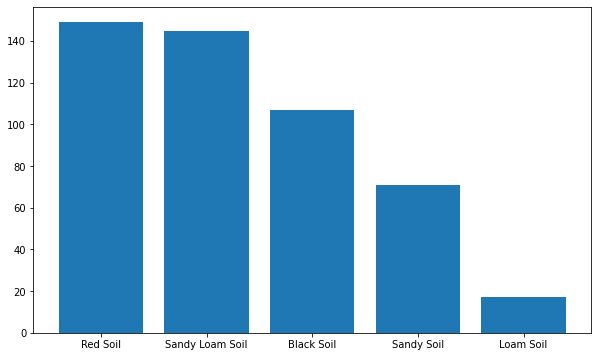

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Blackgram', 'Sandy', 'Paddy', 'Sesumum', 'Sesamum', 'Maize',
       'Black Gram', 'Mango', 'Eucaliptus', 'Cashewnut', 'Ragi',
       'Mango(Intercrop Ragi,)', 'Cashew Nut', 'Mango(Intercrop Ragi)',
       'Mango(Inter Crop Ragi)', 'Red Gram',
       'Mango (Inter Crop Red Gram And Ragi)', 'Oil Palm', 'Mesta',
       'Cashewnut, Mango (Intercrop Maize And Seasamum)', 'Paady',
       'Chilli', 'Sugarcane', 'Banana', 'Coconut', 'Ground Nut', ' Maize',
       'Coconut (Intercop Maize)', 'Cashew Raina', 'Mc', 'Cotton'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                                              176
Maize                                              172
Sesamum                                             43
Coconut                                             26
Blackgram                                           13
Cashew Nut                                           8
Banana                                               7
Mango                                                6
Cashewnut                                            6
Ragi                                                 4
Mesta                                                3
Paady                                                3
Mango(Inter Crop Ragi)                               2
Ground Nut                                           2
Oil Palm                                             2
 Maize                                               1
Eucaliptus                                           1
Red Gram                                             1
Sesumum   

Paddy        179
Maize        173
Sesamum       44
Coconut       27
CashewNut     15
BlackGram     14
Mango         12
Name: Crop, dtype: int64


<BarContainer object of 7 artists>

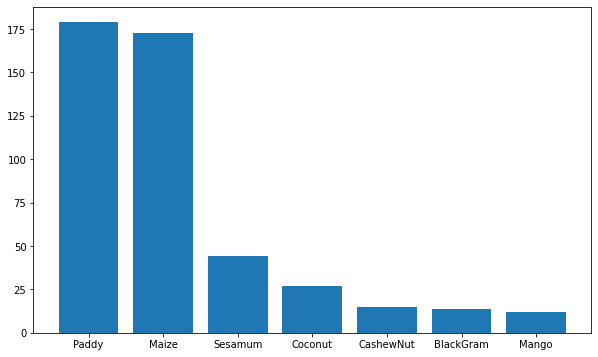

In [15]:
df['Crop'] = df['Crop'].replace(['Blackgram', 'Black Gram'], 'BlackGram')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Sesumum', 'Sesamum')
df['Crop'] = df['Crop'].replace(' Maize', 'Maize')
df['Crop'] = df['Crop'].replace(['Mango(Intercrop Ragi)', 'Mango(Intercrop Ragi,)', 'Mango(Inter Crop Ragi)', 'Mango (Inter Crop Red Gram And Ragi)', 'Cashewnut, Mango (Intercrop Maize And Seasamum)'], 'Mango')
df['Crop'] = df['Crop'].replace(['Cashewnut', 'Cashew Nut', 'Cashew Raina'], 'CashewNut')
df['Crop'] = df['Crop'].replace('Coconut (Intercop Maize)', 'Coconut')
df = df[(df['Crop'] != 'Sandy') & (df['Crop'] != 'Eucaliptus') & (df['Crop'] != 'Mc') & (df['Crop'] != 'Mesta') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Red Gram') & (df['Crop'] != 'Oil Palm') & (df['Crop'] != 'Ragi') & (df['Crop'] != 'Sugarcane') & (df['Crop'] != 'Cotton') & (df['Crop'] != 'Ground Nut')]
df = df[df['Crop'] != 'Banana']

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.281542,0.035015,0.398014,0.317697,0.545172,0.674187,0.252758,0.186213,0.669005,-0.669751,-0.246604,-0.343555,-0.413664
EC,0.281542,1.000000,0.235520,0.346411,0.304910,0.243800,0.491103,0.846380,0.314124,0.349722,-0.146395,0.048183,-0.054909,-0.236761
OC,0.035015,0.235520,1.000000,0.193455,0.228135,0.422226,0.363388,0.354167,0.273680,0.292924,0.337670,0.696471,0.062055,0.123669
P,0.398014,0.346411,0.193455,1.000000,0.463098,0.172051,0.389330,0.380022,0.612654,0.477513,-0.123186,-0.011556,-0.109731,-0.239034
K,0.317697,0.304910,0.228135,0.463098,1.000000,0.266066,0.345684,0.280814,0.352003,0.335616,-0.248655,-0.081370,0.065889,-0.212138
Ca,0.545172,0.243800,0.422226,0.172051,0.266066,1.000000,0.779671,0.307892,0.024606,0.458529,-0.174735,0.284958,-0.212633,-0.068701
Mg,0.674187,0.491103,0.363388,0.389330,0.345684,0.779671,1.000000,0.478890,0.139498,0.739764,-0.319765,0.154586,-0.228722,-0.277063
S,0.252758,0.846380,0.354167,0.380022,0.280814,0.307892,0.478890,1.000000,0.301916,0.400227,-0.029385,0.196379,-0.060452,-0.181391
Zn,0.186213,0.314124,0.273680,0.612654,0.352003,0.024606,0.139498,0.301916,1.000000,0.173359,-0.006438,0.089369,0.105286,-0.168289
B,0.669005,0.349722,0.292924,0.477513,0.335616,0.458529,0.739764,0.400227,0.173359,1.000000,-0.330251,0.070365,-0.320651,-0.325082


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Fe', 'Mn', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P  ...  Loam Soil  Red Soil  Sandy Loam Soil  Sandy Soil
3744  8.46  0.24  0.19  2.41  ...          0         0                0           0

[1 rows x 13 columns]
3744    BlackGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:8] = sc1.fit_transform(X[:, 0:8])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.767515923566879


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.85 %
Standard Deviation: 2.69 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7197452229299363


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.45 %
Standard Deviation: 3.74 %


# Random Forest Classifier

In [35]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.856687898089172


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.05 %
Standard Deviation: 3.94 %


In [39]:
pickle.dump(clf3_3, open('Vizianagaram_model.pkl', 'wb'))
pickle.dump(sc2, open('Vizianagaram_scaler.pkl', 'wb'))

# XGBoost

In [40]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8343949044585988


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.65 %
Standard Deviation: 2.48 %


# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8498402555910544
Testing Accuracy:  0.7961783439490446


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.02 %
Standard Deviation: 4.30 %


# Catboost

In [49]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.4761260	total: 51.2ms	remaining: 5.07s
1:	learn: 1.1229861	total: 53.2ms	remaining: 2.61s
2:	learn: 1.0615150	total: 54.7ms	remaining: 1.77s
3:	learn: 0.9852815	total: 56.2ms	remaining: 1.35s
4:	learn: 0.9433702	total: 57.7ms	remaining: 1.09s
5:	learn: 0.8977704	total: 59.1ms	remaining: 925ms
6:	learn: 0.8774564	total: 60.4ms	remaining: 803ms
7:	learn: 0.8320150	total: 61.9ms	remaining: 712ms
8:	learn: 0.8044511	total: 63.5ms	remaining: 642ms
9:	learn: 0.7740330	total: 64.9ms	remaining: 585ms
10:	learn: 0.7541485	total: 66.4ms	remaining: 537ms
11:	learn: 0.7409698	total: 67.8ms	remaining: 497ms
12:	learn: 0.7113764	total: 69.2ms	remaining: 463ms
13:	learn: 0.6859543	total: 70.6ms	remaining: 434ms
14:	learn: 0.6747876	total: 72.2ms	remaining: 409ms
15:	learn: 0.6394745	total: 73.6ms	remaining: 387ms
16:	learn: 0.6107638	total: 75.1ms	remaining: 366ms
17:	learn: 0.5906759	total: 76.5ms	remaining: 348ms
18:	learn: 0.5865793	total: 77.8ms	remaining: 332ms
19:	learn: 0.5749420	t

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.041852327
bestIteration = 99

Training on fold [1/5]

bestTest = 1.076181573
bestIteration = 99

Training on fold [2/5]

bestTest = 1.011878256
bestIteration = 99

Training on fold [3/5]

bestTest = 1.018256982
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9978908649
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.5918225	total: 488ms	remaining: 2m 42s
3:	learn: 1.5060773	total: 644ms	remaining: 2m 40s
4:	learn: 1.4276907	total: 808ms	remaining: 2m 40s
5:	learn: 1.3457173	total: 960ms	remaining: 2m 38s
6:	learn: 1.2784486	total: 1.12s	remaining: 2m 38s
7:	learn: 1.2228001	total: 1.28s	remaining: 2m 38s
8:	learn: 1.1695823	total: 1.44s	remaining: 2m 38s
9:	learn: 1.1257249	total: 1.59s	remaining: 2m 37s
10:	learn: 1.0871761	total: 1.75s	remaining: 2m 37s
11:	learn: 1.0465856	total: 1.91s	remaining: 2m 36s
12:	learn: 1.0091478	total: 2.06s	remaining: 2m 36s
13:	learn: 0.9741001	total: 2.22s	remaining: 2m 36s
14:	learn: 0.9405078	total: 2.4s	remaining: 2m 37s
15:	learn: 0.9117727	total: 2.55s	remaining: 2m 36s
16:	learn: 0.8816050	total: 2.71s	remaining: 2m 36s
17:	learn: 0.8559596	total: 2.86s	remaining: 2m 35s
18:	learn: 0.8290932	total: 3.02s	remaining: 2m 35s
19:	learn: 0.8069020	total: 3.18s	remaining: 2m 35s
20:	learn: 0.7844375	t